## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9670590	total: 57.6ms	remaining: 57.6s
1:	learn: 0.9473582	total: 58.6ms	remaining: 29.2s
2:	learn: 0.9262988	total: 59.6ms	remaining: 19.8s
3:	learn: 0.9102103	total: 60.5ms	remaining: 15.1s
4:	learn: 0.8939466	total: 61.5ms	remaining: 12.2s
5:	learn: 0.8780774	total: 62.4ms	remaining: 10.3s
6:	learn: 0.8630871	total: 63.3ms	remaining: 8.97s
7:	learn: 0.8467113	total: 64.2ms	remaining: 7.96s
8:	learn: 0.8324325	total: 65.1ms	remaining: 7.17s
9:	learn: 0.8174707	total: 66ms	remaining: 6.54s
10:	learn: 0.8037177	total: 66.9ms	remaining: 6.02s
11:	learn: 0.7903582	total: 67.8ms	remaining: 5.58s
12:	learn: 0.7761769	total: 68.6ms	remaining: 5.21s
13:	learn: 0.7624678	total: 69.5ms	remaining: 4.9s
14:	learn: 0.7510324	total: 70.3ms	remaining: 4.62s
15:	learn: 0.7377973	total: 71.2ms	remaining: 4.38s
16:	learn: 0.7265928	total: 72ms	remaining: 4.16s
17:	learn: 0.7154667	total: 72.7ms	remaining: 3.97s
18:	learn: 0.7035515	total: 73.4ms	remaining: 3.7

62:	learn: 0.4110455	total: 108ms	remaining: 1.61s
63:	learn: 0.4074821	total: 109ms	remaining: 1.6s
64:	learn: 0.4042507	total: 110ms	remaining: 1.58s
65:	learn: 0.4014656	total: 111ms	remaining: 1.57s
66:	learn: 0.3980157	total: 112ms	remaining: 1.56s
67:	learn: 0.3953569	total: 113ms	remaining: 1.54s
68:	learn: 0.3923515	total: 114ms	remaining: 1.53s
69:	learn: 0.3892574	total: 115ms	remaining: 1.52s
70:	learn: 0.3855643	total: 115ms	remaining: 1.51s
71:	learn: 0.3816701	total: 116ms	remaining: 1.5s
72:	learn: 0.3788593	total: 117ms	remaining: 1.48s
73:	learn: 0.3758452	total: 118ms	remaining: 1.47s
74:	learn: 0.3726601	total: 119ms	remaining: 1.46s
75:	learn: 0.3695381	total: 119ms	remaining: 1.45s
76:	learn: 0.3672498	total: 120ms	remaining: 1.44s
77:	learn: 0.3647492	total: 121ms	remaining: 1.43s
78:	learn: 0.3618154	total: 122ms	remaining: 1.42s
79:	learn: 0.3595047	total: 123ms	remaining: 1.41s
80:	learn: 0.3570974	total: 124ms	remaining: 1.4s
81:	learn: 0.3541658	total: 124ms	

161:	learn: 0.2454063	total: 191ms	remaining: 989ms
162:	learn: 0.2449248	total: 192ms	remaining: 987ms
163:	learn: 0.2441594	total: 193ms	remaining: 983ms
164:	learn: 0.2435927	total: 194ms	remaining: 980ms
165:	learn: 0.2429189	total: 194ms	remaining: 977ms
166:	learn: 0.2421273	total: 195ms	remaining: 974ms
167:	learn: 0.2413665	total: 196ms	remaining: 972ms
168:	learn: 0.2407071	total: 197ms	remaining: 969ms
169:	learn: 0.2400029	total: 198ms	remaining: 966ms
170:	learn: 0.2393125	total: 199ms	remaining: 963ms
171:	learn: 0.2388070	total: 200ms	remaining: 960ms
172:	learn: 0.2377667	total: 200ms	remaining: 957ms
173:	learn: 0.2370397	total: 201ms	remaining: 955ms
174:	learn: 0.2364101	total: 202ms	remaining: 953ms
175:	learn: 0.2359922	total: 203ms	remaining: 950ms
176:	learn: 0.2352651	total: 204ms	remaining: 948ms
177:	learn: 0.2346293	total: 205ms	remaining: 945ms
178:	learn: 0.2339355	total: 206ms	remaining: 944ms
179:	learn: 0.2333402	total: 207ms	remaining: 941ms
180:	learn: 

288:	learn: 0.1774686	total: 298ms	remaining: 733ms
289:	learn: 0.1771002	total: 299ms	remaining: 732ms
290:	learn: 0.1767556	total: 300ms	remaining: 730ms
291:	learn: 0.1765070	total: 301ms	remaining: 729ms
292:	learn: 0.1761973	total: 301ms	remaining: 727ms
293:	learn: 0.1759826	total: 302ms	remaining: 726ms
294:	learn: 0.1756812	total: 303ms	remaining: 725ms
295:	learn: 0.1751531	total: 304ms	remaining: 723ms
296:	learn: 0.1749864	total: 305ms	remaining: 722ms
297:	learn: 0.1747045	total: 306ms	remaining: 720ms
298:	learn: 0.1742868	total: 307ms	remaining: 719ms
299:	learn: 0.1739414	total: 307ms	remaining: 717ms
300:	learn: 0.1733879	total: 308ms	remaining: 716ms
301:	learn: 0.1729582	total: 309ms	remaining: 714ms
302:	learn: 0.1725409	total: 310ms	remaining: 713ms
303:	learn: 0.1720561	total: 311ms	remaining: 711ms
304:	learn: 0.1715405	total: 311ms	remaining: 710ms
305:	learn: 0.1709683	total: 312ms	remaining: 708ms
306:	learn: 0.1704350	total: 313ms	remaining: 707ms
307:	learn: 

387:	learn: 0.1447519	total: 381ms	remaining: 601ms
388:	learn: 0.1445368	total: 382ms	remaining: 600ms
389:	learn: 0.1442355	total: 383ms	remaining: 599ms
390:	learn: 0.1440965	total: 384ms	remaining: 598ms
391:	learn: 0.1438359	total: 385ms	remaining: 596ms
392:	learn: 0.1434332	total: 385ms	remaining: 595ms
393:	learn: 0.1431410	total: 386ms	remaining: 594ms
394:	learn: 0.1429000	total: 387ms	remaining: 593ms
395:	learn: 0.1426201	total: 388ms	remaining: 592ms
396:	learn: 0.1421926	total: 389ms	remaining: 591ms
397:	learn: 0.1421348	total: 390ms	remaining: 590ms
398:	learn: 0.1417603	total: 391ms	remaining: 589ms
399:	learn: 0.1415094	total: 391ms	remaining: 587ms
400:	learn: 0.1412046	total: 392ms	remaining: 586ms
401:	learn: 0.1407584	total: 393ms	remaining: 585ms
402:	learn: 0.1406380	total: 394ms	remaining: 583ms
403:	learn: 0.1403414	total: 395ms	remaining: 582ms
404:	learn: 0.1400336	total: 395ms	remaining: 581ms
405:	learn: 0.1397964	total: 396ms	remaining: 580ms
406:	learn: 

515:	learn: 0.1129138	total: 488ms	remaining: 458ms
516:	learn: 0.1126648	total: 489ms	remaining: 457ms
517:	learn: 0.1123994	total: 490ms	remaining: 456ms
518:	learn: 0.1121154	total: 491ms	remaining: 455ms
519:	learn: 0.1119516	total: 492ms	remaining: 454ms
520:	learn: 0.1119074	total: 493ms	remaining: 453ms
521:	learn: 0.1117356	total: 493ms	remaining: 452ms
522:	learn: 0.1116187	total: 494ms	remaining: 451ms
523:	learn: 0.1113950	total: 495ms	remaining: 450ms
524:	learn: 0.1111126	total: 496ms	remaining: 449ms
525:	learn: 0.1108284	total: 497ms	remaining: 448ms
526:	learn: 0.1106489	total: 498ms	remaining: 447ms
527:	learn: 0.1105016	total: 498ms	remaining: 446ms
528:	learn: 0.1101868	total: 499ms	remaining: 445ms
529:	learn: 0.1099424	total: 500ms	remaining: 444ms
530:	learn: 0.1096996	total: 501ms	remaining: 443ms
531:	learn: 0.1095309	total: 502ms	remaining: 441ms
532:	learn: 0.1093088	total: 503ms	remaining: 440ms
533:	learn: 0.1092733	total: 503ms	remaining: 439ms
534:	learn: 

614:	learn: 0.0959467	total: 571ms	remaining: 358ms
615:	learn: 0.0957729	total: 572ms	remaining: 357ms
616:	learn: 0.0955402	total: 573ms	remaining: 356ms
617:	learn: 0.0953990	total: 574ms	remaining: 355ms
618:	learn: 0.0952723	total: 575ms	remaining: 354ms
619:	learn: 0.0951274	total: 576ms	remaining: 353ms
620:	learn: 0.0949719	total: 577ms	remaining: 352ms
621:	learn: 0.0947058	total: 578ms	remaining: 351ms
622:	learn: 0.0944787	total: 579ms	remaining: 350ms
623:	learn: 0.0944588	total: 580ms	remaining: 349ms
624:	learn: 0.0943744	total: 581ms	remaining: 348ms
625:	learn: 0.0942341	total: 582ms	remaining: 348ms
626:	learn: 0.0941311	total: 583ms	remaining: 347ms
627:	learn: 0.0940142	total: 583ms	remaining: 346ms
628:	learn: 0.0939214	total: 584ms	remaining: 345ms
629:	learn: 0.0937239	total: 585ms	remaining: 344ms
630:	learn: 0.0937060	total: 586ms	remaining: 342ms
631:	learn: 0.0935414	total: 586ms	remaining: 341ms
632:	learn: 0.0933627	total: 587ms	remaining: 340ms
633:	learn: 

724:	learn: 0.0808208	total: 664ms	remaining: 252ms
725:	learn: 0.0807225	total: 665ms	remaining: 251ms
726:	learn: 0.0805949	total: 666ms	remaining: 250ms
727:	learn: 0.0804804	total: 667ms	remaining: 249ms
728:	learn: 0.0803541	total: 667ms	remaining: 248ms
729:	learn: 0.0801274	total: 668ms	remaining: 247ms
730:	learn: 0.0800270	total: 669ms	remaining: 246ms
731:	learn: 0.0798770	total: 670ms	remaining: 245ms
732:	learn: 0.0797721	total: 671ms	remaining: 244ms
733:	learn: 0.0796380	total: 672ms	remaining: 243ms
734:	learn: 0.0796236	total: 673ms	remaining: 242ms
735:	learn: 0.0795245	total: 673ms	remaining: 242ms
736:	learn: 0.0794022	total: 674ms	remaining: 241ms
737:	learn: 0.0792630	total: 675ms	remaining: 240ms
738:	learn: 0.0792371	total: 676ms	remaining: 239ms
739:	learn: 0.0791649	total: 677ms	remaining: 238ms
740:	learn: 0.0789666	total: 677ms	remaining: 237ms
741:	learn: 0.0788291	total: 678ms	remaining: 236ms
742:	learn: 0.0787100	total: 679ms	remaining: 235ms
743:	learn: 

823:	learn: 0.0701165	total: 747ms	remaining: 160ms
824:	learn: 0.0700355	total: 748ms	remaining: 159ms
825:	learn: 0.0698683	total: 749ms	remaining: 158ms
826:	learn: 0.0696871	total: 749ms	remaining: 157ms
827:	learn: 0.0695924	total: 750ms	remaining: 156ms
828:	learn: 0.0695554	total: 751ms	remaining: 155ms
829:	learn: 0.0695326	total: 752ms	remaining: 154ms
830:	learn: 0.0695190	total: 753ms	remaining: 153ms
831:	learn: 0.0694246	total: 754ms	remaining: 152ms
832:	learn: 0.0693539	total: 754ms	remaining: 151ms
833:	learn: 0.0692933	total: 755ms	remaining: 150ms
834:	learn: 0.0691621	total: 756ms	remaining: 149ms
835:	learn: 0.0689541	total: 757ms	remaining: 148ms
836:	learn: 0.0688836	total: 758ms	remaining: 148ms
837:	learn: 0.0687557	total: 759ms	remaining: 147ms
838:	learn: 0.0686450	total: 760ms	remaining: 146ms
839:	learn: 0.0685207	total: 760ms	remaining: 145ms
840:	learn: 0.0684155	total: 761ms	remaining: 144ms
841:	learn: 0.0683552	total: 762ms	remaining: 143ms
842:	learn: 

952:	learn: 0.0586555	total: 854ms	remaining: 42.1ms
953:	learn: 0.0585267	total: 855ms	remaining: 41.2ms
954:	learn: 0.0585146	total: 856ms	remaining: 40.3ms
955:	learn: 0.0584712	total: 857ms	remaining: 39.4ms
956:	learn: 0.0584193	total: 858ms	remaining: 38.5ms
957:	learn: 0.0584080	total: 859ms	remaining: 37.6ms
958:	learn: 0.0583047	total: 859ms	remaining: 36.7ms
959:	learn: 0.0581898	total: 860ms	remaining: 35.8ms
960:	learn: 0.0580728	total: 861ms	remaining: 34.9ms
961:	learn: 0.0580631	total: 862ms	remaining: 34ms
962:	learn: 0.0579752	total: 863ms	remaining: 33.1ms
963:	learn: 0.0578895	total: 863ms	remaining: 32.2ms
964:	learn: 0.0578437	total: 864ms	remaining: 31.3ms
965:	learn: 0.0577256	total: 865ms	remaining: 30.4ms
966:	learn: 0.0576287	total: 866ms	remaining: 29.5ms
967:	learn: 0.0575046	total: 866ms	remaining: 28.6ms
968:	learn: 0.0574817	total: 867ms	remaining: 27.7ms
969:	learn: 0.0573515	total: 868ms	remaining: 26.9ms
970:	learn: 0.0572937	total: 869ms	remaining: 26

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

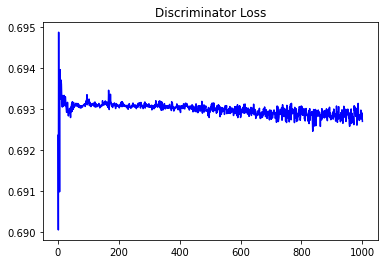

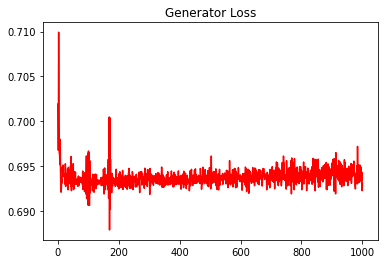

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.08339038702041178


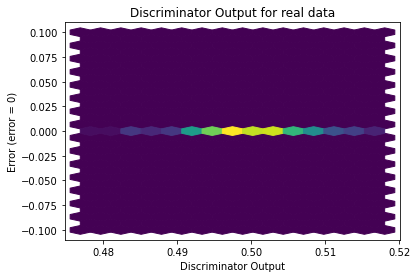

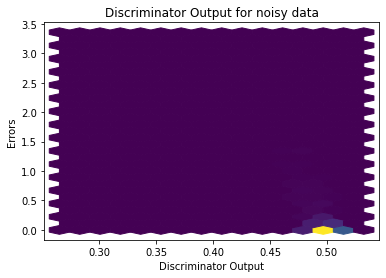

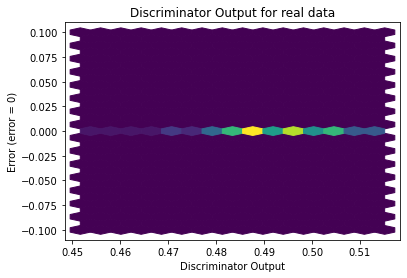

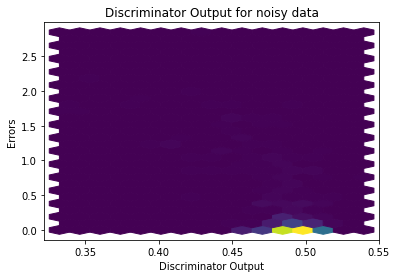

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


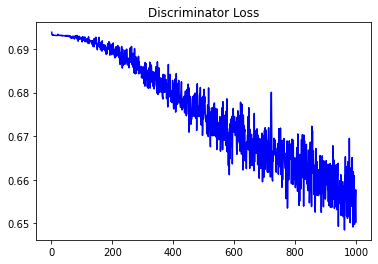

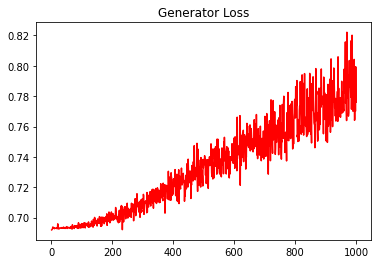

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.09317126239707757


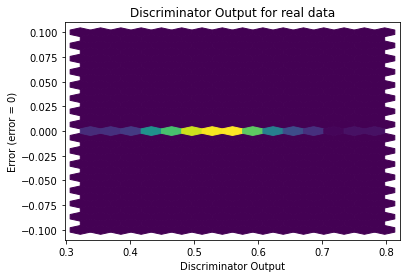

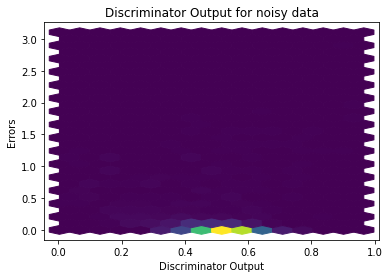

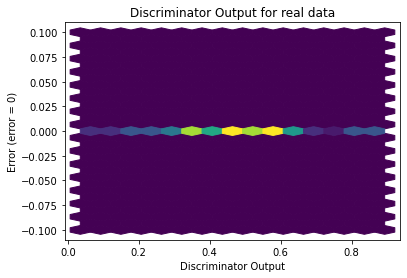

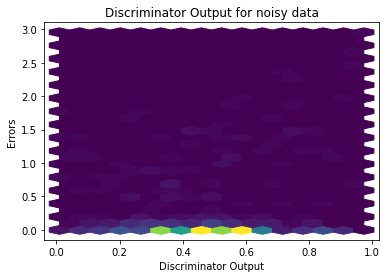

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)
